# Airline Passenger Satisfaction

###### Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience.

* Recommended Analysis




* Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

* What is the customer profile for a repeating airline passenger?

* Does flight distance affect customer preferences or flight patterns?

* Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import plotly.express as px

In [2]:
df=pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [8]:
df['mean value'] = df['Departure and Arrival Time Convenience'] + df['Ease of Online Booking'] +df['Check-in Service'] +df['Online Boarding'] +df['Gate Location'] +df['On-board Service'] +df['Seat Comfort']+df['Leg Room Service']+df['Cleanliness']+df['Food and Drink']+df['In-flight Service']+df['In-flight Wifi Service']+df['In-flight Entertainment']+df['Baggage Handling']
       

C:\Users\hp\AppData\Local\Temp\ipykernel_7056\3127723817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean value'] = df['Departure and Arrival Time Convenience'] + df['Ease of Online Booking'] +df['Check-in Service'] +df['Online Boarding'] +df['Gate Location'] +df['On-board Service'] +df['Seat Comfort']+df['Leg Room Service']+df['Cleanliness']+df['Food and Drink']+df['In-flight Service']+df['In-flight Wifi Service']+df['In-flight Entertainment']+df['Baggage Handling']


In [9]:
df=df.dropna()
df.head(3)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,mean value
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,54
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,53
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,55


In [ ]:
df['mean value'] = df[]

In [13]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [16]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

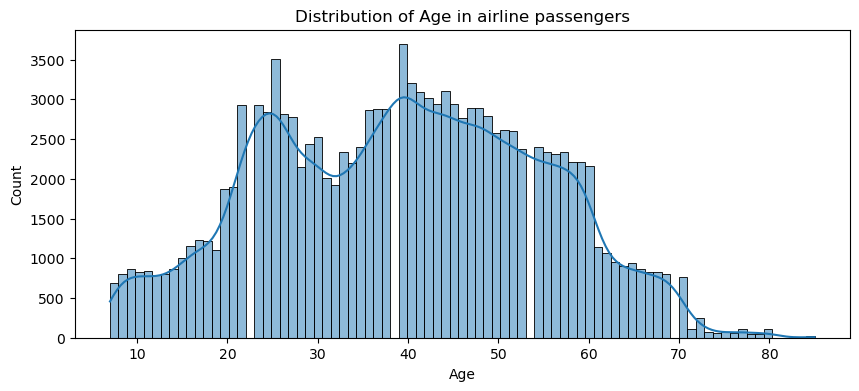

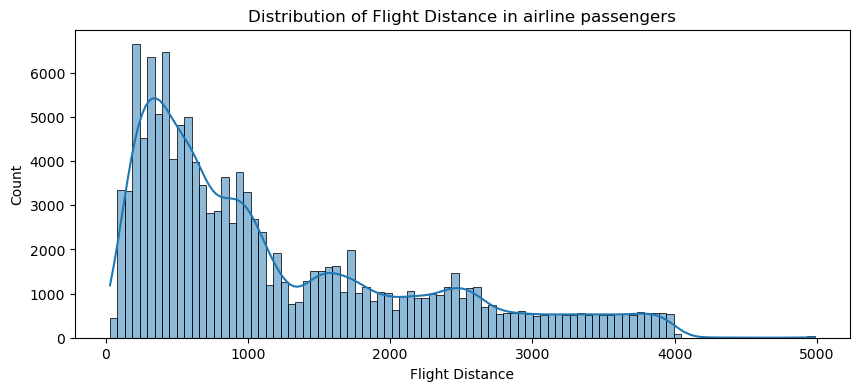

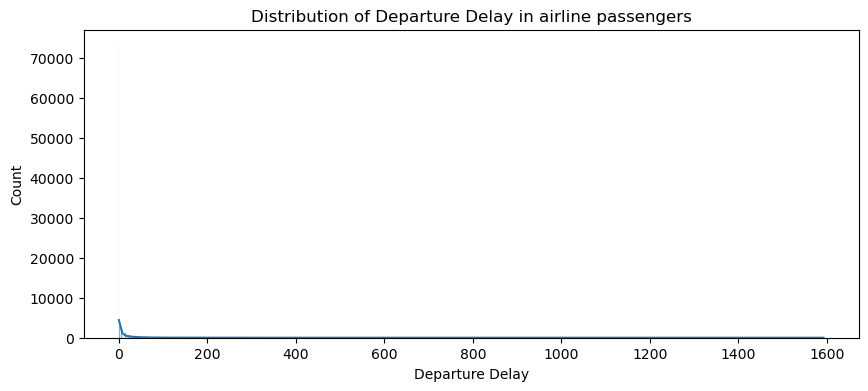

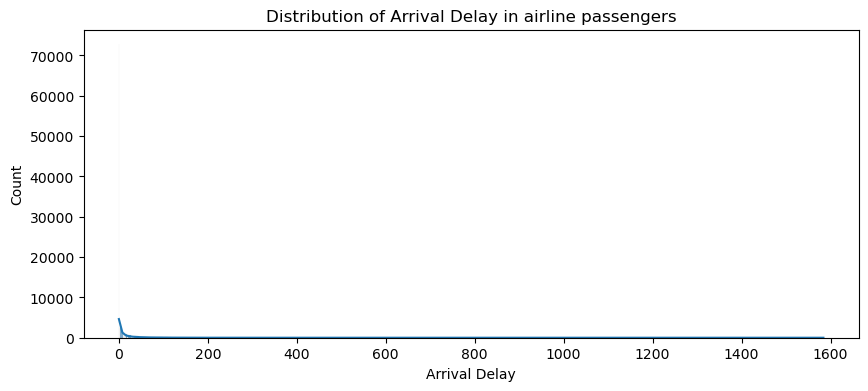

In [13]:
Numerical_Category = ['Age','Flight Distance','Departure Delay','Arrival Delay']

for feature in Numerical_Category:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=feature , kde=True)
    plt.title('Distribution of ' + feature + ' in airline passengers')
    plt.show()

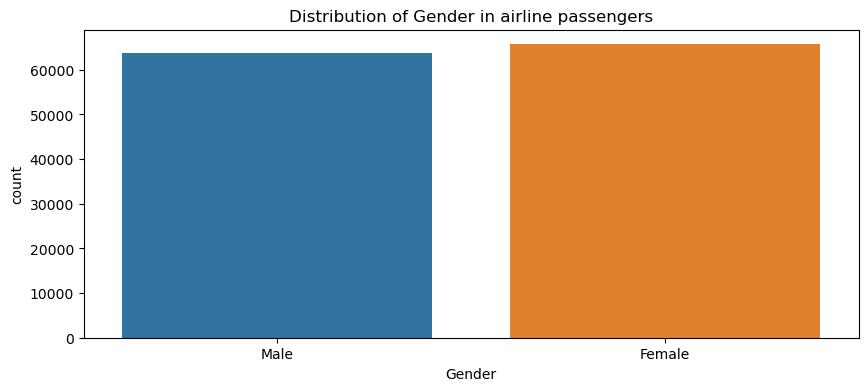

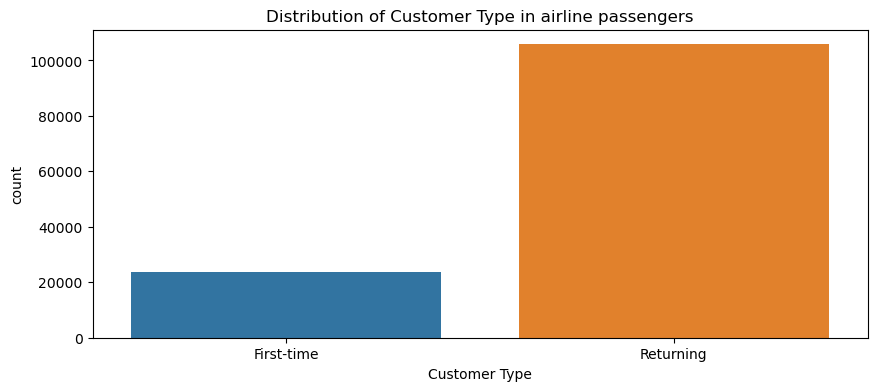

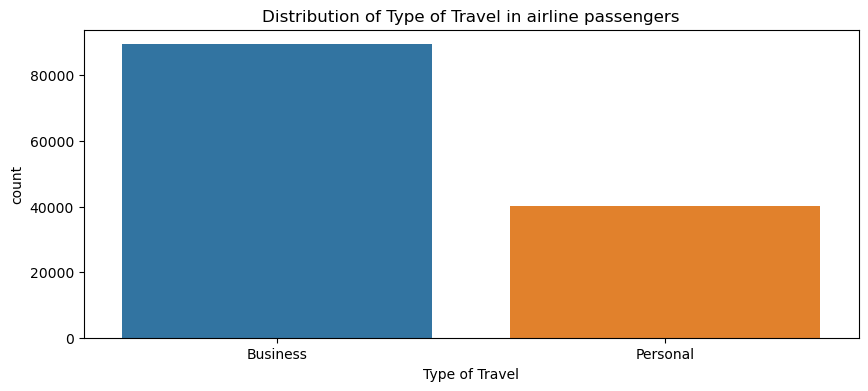

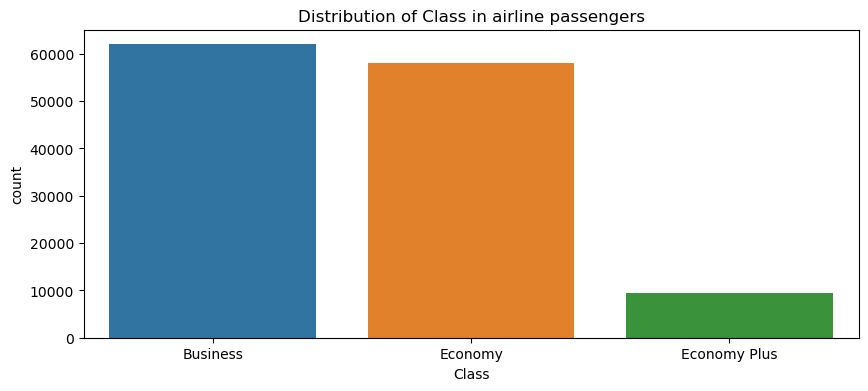

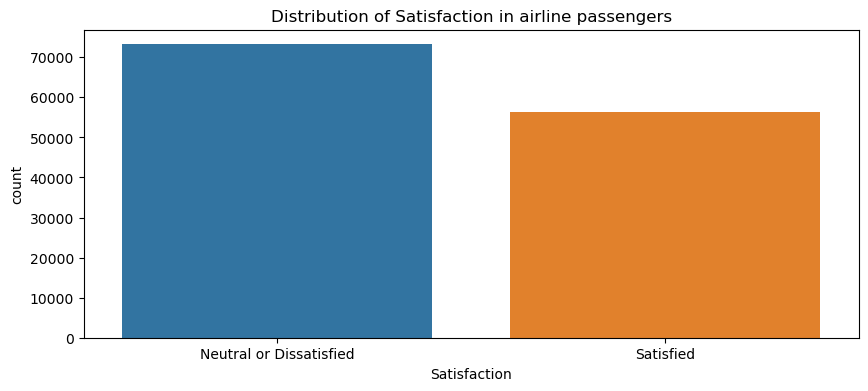

In [21]:
Other_category = ['Gender','Customer Type','Type of Travel', 'Class', 'Satisfaction']

for feature in Other_category:
    plt.figure(figsize=(10,4))
    ay=sns.countplot(data=df , x=feature )
    plt.title('Distribution of ' + feature + ' in airline passengers')
    plt.show()
    
for bars in ay.containers:
    ay.bar_label(bars)

In [24]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

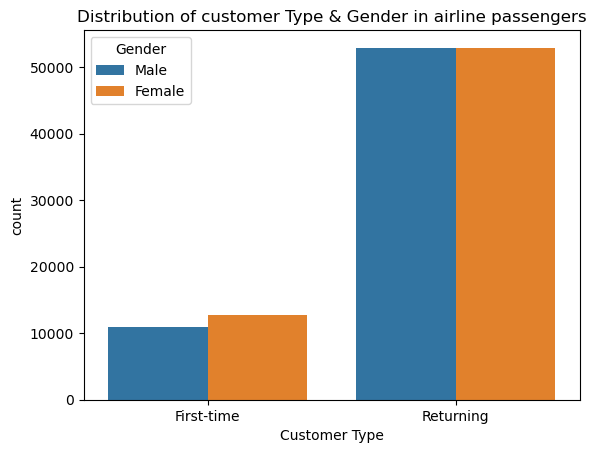

In [30]:
sns.countplot(data=df , x='Customer Type' , hue='Gender')
plt.title('Distribution of customer Type & Gender in airline passengers')
plt.show()

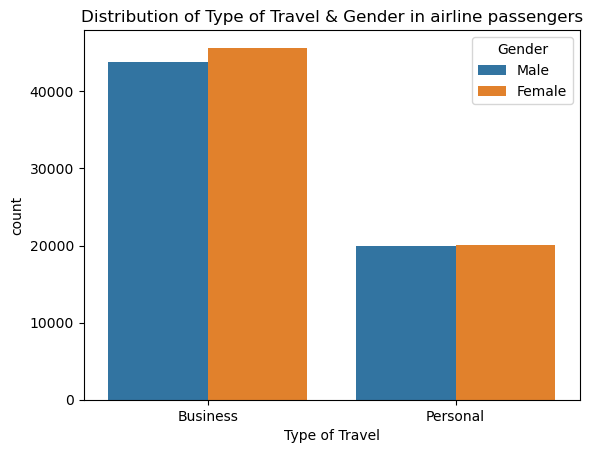

In [31]:
sns.countplot(data=df , x='Type of Travel' , hue='Gender')
plt.title('Distribution of Type of Travel & Gender in airline passengers')
plt.show()

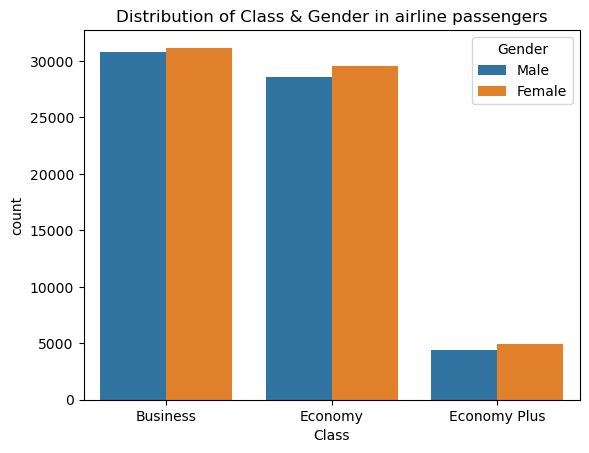

In [32]:
sns.countplot(data=df , x='Class' , hue='Gender')
plt.title('Distribution of Class & Gender in airline passengers')
plt.show()

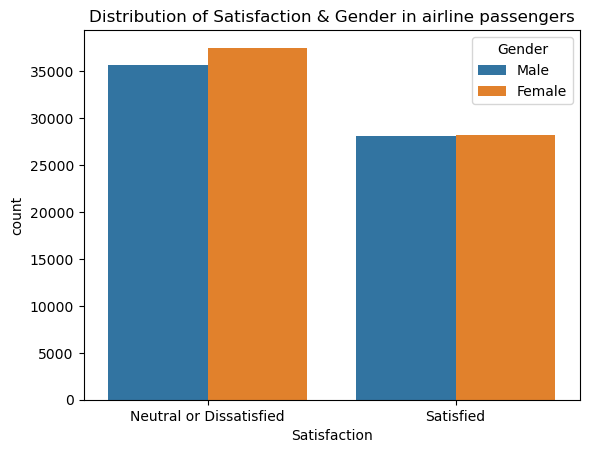

In [33]:
sns.countplot(data=df , x='Satisfaction' , hue='Gender')
plt.title('Distribution of Satisfaction & Gender in airline passengers')
plt.show()

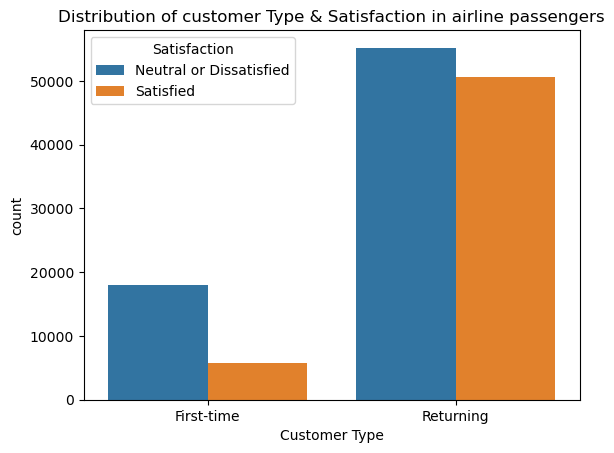

In [38]:
sns.countplot(data=df , x='Customer Type' , hue='Satisfaction')
plt.title('Distribution of customer Type & Satisfaction in airline passengers')
plt.show()

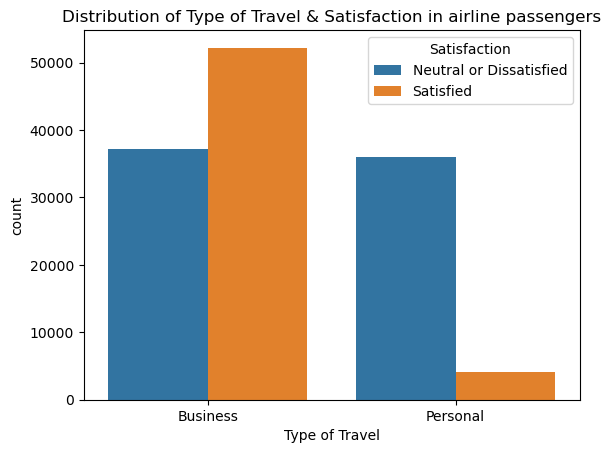

In [37]:
sns.countplot(data=df , x='Type of Travel' , hue='Satisfaction')
plt.title('Distribution of Type of Travel & Satisfaction in airline passengers')
plt.show()

In [8]:
df_repeat=df[df['Customer Type']=='Returning']
df_repeat

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


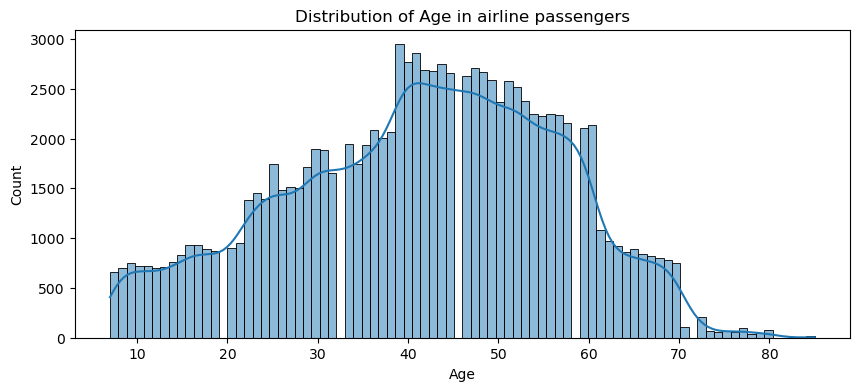

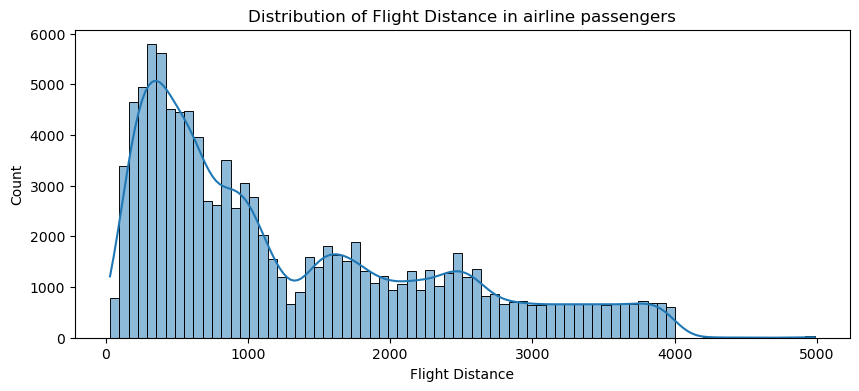

In [10]:
Numerical_Category_1 = ['Age','Flight Distance']

for feature in Numerical_Category_1:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df_repeat, x=feature , kde=True)
    plt.title('Distribution of ' + feature + ' in airline passengers')
    plt.show()

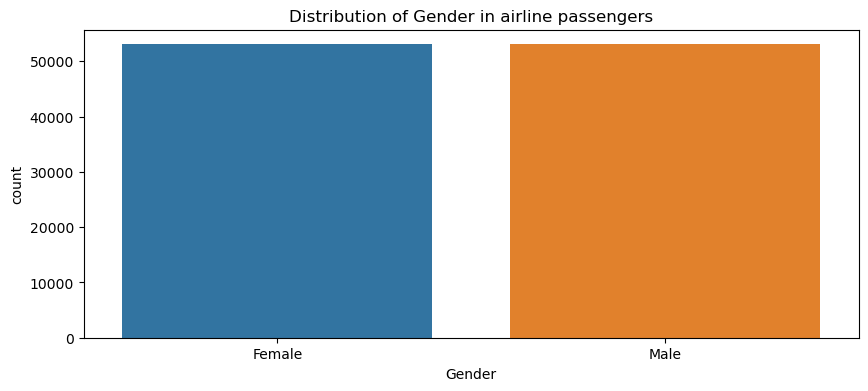

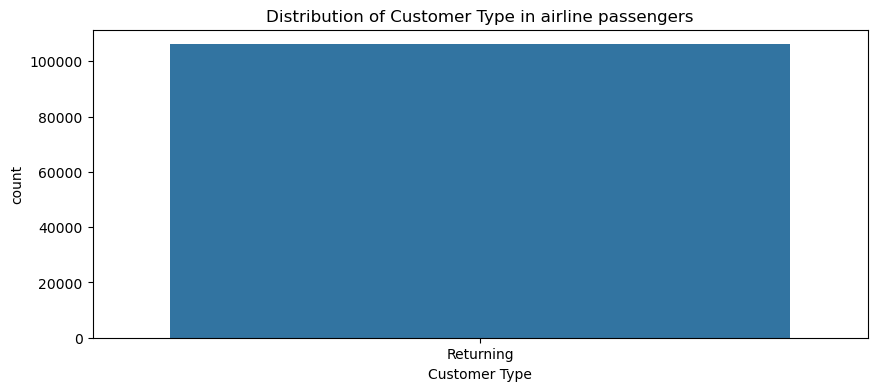

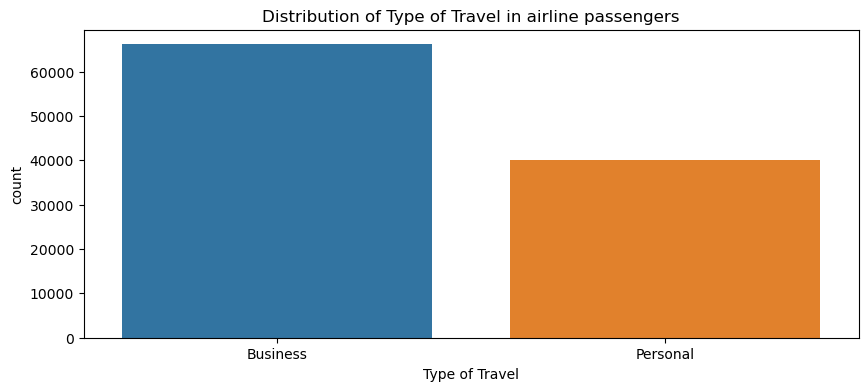

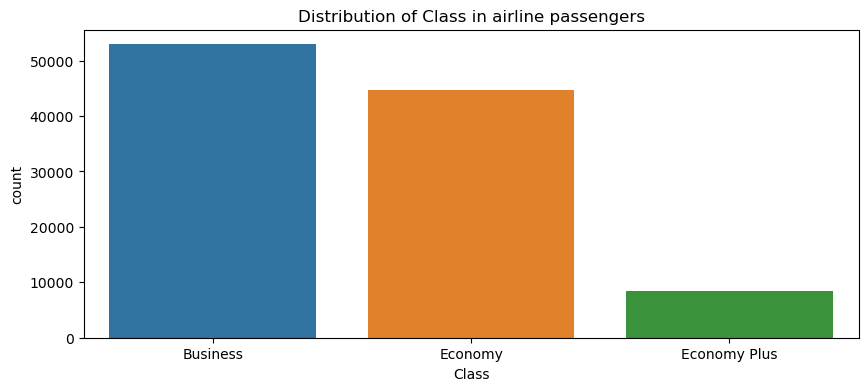

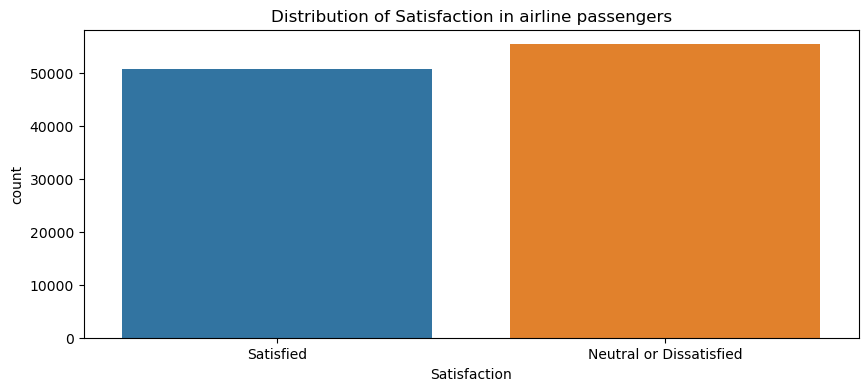

In [12]:
Other_category_1 = ['Gender','Customer Type','Type of Travel', 'Class', 'Satisfaction']

for feature in Other_category_1:
    plt.figure(figsize=(10,4))
    ay=sns.countplot(data=df_repeat , x=feature )
    plt.title('Distribution of ' + feature + ' in airline passengers')
    plt.show()

In [15]:
df_Satisfaction=df[df['Satisfaction']=='Satisfied']
df_Satisfaction.head(4)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,mean value
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,53
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,55
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,53
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,49


In [14]:
df_not_Satisfaction=df[df['Satisfaction']=='Neutral or Dissatisfied']
df_not_Satisfaction.head(4)


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,mean value
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,54
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,41
10,11,Female,28,First-time,Business,Business,821,0,5.0,1,...,2,5,2,2,4,1,2,3,Neutral or Dissatisfied,32
11,12,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,5,1,1,3,1,1,4,Neutral or Dissatisfied,31


In [19]:
df_not_Satisfaction.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_7056\2634956567.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_not_Satisfaction.mean()


ID                                        64531.463817
Age                                          37.653069
Flight Distance                             929.456333
Departure Delay                              16.340184
Arrival Delay                                17.055992
Departure and Arrival Time Convenience        3.130229
Ease of Online Booking                        2.549512
Check-in Service                              3.043045
Online Boarding                               2.658846
Gate Location                                 2.980184
On-board Service                              3.019570
Seat Comfort                                  3.038525
Leg Room Service                              2.990495
Cleanliness                                   2.932851
Food and Drink                                2.958525
In-flight Service                             3.389662
In-flight Wifi Service                        2.398470
In-flight Entertainment                       2.892236
Baggage Ha

In [20]:
df_Satisfaction.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_7056\908980875.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Satisfaction.mean()


ID                                        65513.908286
Age                                          41.739824
Flight Distance                            1529.582454
Departure Delay                              12.435001
Arrival Delay                                12.533859
Departure and Arrival Time Convenience        2.962497
Ease of Online Booking                        3.026554
Check-in Service                              3.648786
Online Boarding                               4.025648
Gate Location                                 2.972646
On-board Service                              3.856475
Seat Comfort                                  3.966176
Leg Room Service                              3.820376
Cleanliness                                   3.746134
Food and Drink                                3.525061
In-flight Service                             3.971277
In-flight Wifi Service                        3.158135
In-flight Entertainment                       3.964345
Baggage Ha

In [28]:
difference=df_Satisfaction.mean()-df_not_Satisfaction.mean()
difference


C:\Users\hp\AppData\Local\Temp\ipykernel_7056\3965166747.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  difference=df_Satisfaction.mean()-df_not_Satisfaction.mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_7056\3965166747.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  difference=df_Satisfaction.mean()-df_not_Satisfaction.mean()


ID                                        982.444469
Age                                         4.086755
Flight Distance                           600.126120
Departure Delay                            -3.905184
Arrival Delay                              -4.522132
Departure and Arrival Time Convenience     -0.167732
Ease of Online Booking                      0.477043
Check-in Service                            0.605741
Online Boarding                             1.366802
Gate Location                              -0.007539
On-board Service                            0.836905
Seat Comfort                                0.927651
Leg Room Service                            0.829881
Cleanliness                                 0.813283
Food and Drink                              0.566536
In-flight Service                           0.581615
In-flight Wifi Service                      0.759665
In-flight Entertainment                     1.072109
Baggage Handling                            0.